In [22]:
import numpy as np
import pandas as pd
import pylab as pl
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from sklearn.metrics import r2_score

In [23]:
data = "./DataSets/FuelConsumptionCo2.csv"
df = pd.read_csv(data)

In [24]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [25]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [26]:
df_ = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
df_.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


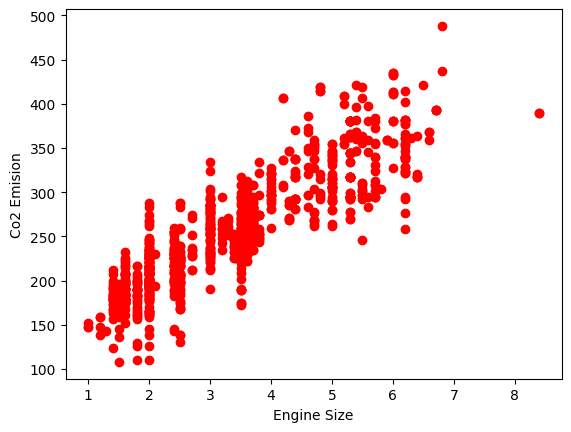

In [27]:
plt.scatter(df_.ENGINESIZE, df_.CO2EMISSIONS, color = 'red')
plt.xlabel("Engine Size")
plt.ylabel("Co2 Emision")
plt.show()

In [28]:
mask = np.random.rand(len(df)) < 0.8
train = df_[mask]
test = df_[~mask]

In [29]:
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])

poly = PolynomialFeatures(degree= 2)
train_x_poly = poly.fit_transform(train_x)
train_x_poly

array([[ 1.  ,  2.4 ,  5.76],
       [ 1.  ,  1.5 ,  2.25],
       [ 1.  ,  3.5 , 12.25],
       ...,
       [ 1.  ,  3.2 , 10.24],
       [ 1.  ,  3.  ,  9.  ],
       [ 1.  ,  3.2 , 10.24]])

In [30]:
reg = linear_model.LinearRegression()
train_y_ = reg.fit(train_x_poly, train_y)

print('Coefficients: ', reg.coef_)
print('Intercept: ', reg.intercept_)

Coefficients:  [[ 0.         50.29609711 -1.55719293]]
Intercept:  [108.5007314]


Text(0, 0.5, 'Co2_Emision')

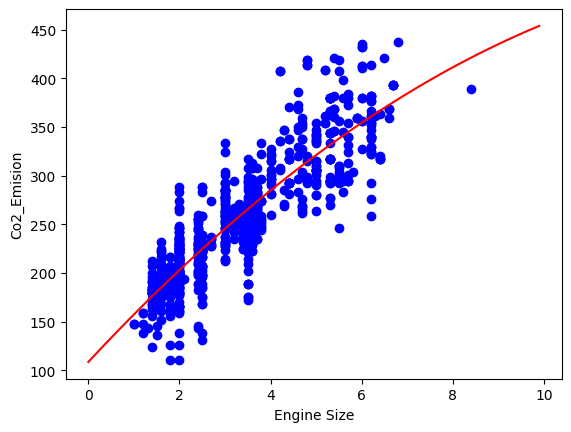

In [31]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color = 'blue')
xx = np.arange(0.0, 10.0, 0.1)
yy = reg.intercept_[0] + reg.coef_[0][1] * xx + reg.coef_[0][2] * np.power(xx, 2)
plt.plot(xx, yy, '-r')
plt.xlabel('Engine Size')
plt.ylabel('Co2_Emision')


In [32]:
test_x_poly = poly.fit_transform(test_x)
test_y_ = reg.predict(test_x_poly)
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y, test_y_))

Mean absolute error: 22.06
Residual sum of squares (MSE): 818.12
R2-score: 0.80


In [33]:
#practice
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])

poly = PolynomialFeatures(degree= 3)
train_x_poly = poly.fit_transform(train_x)
train_x_poly

array([[ 1.   ,  2.4  ,  5.76 , 13.824],
       [ 1.   ,  1.5  ,  2.25 ,  3.375],
       [ 1.   ,  3.5  , 12.25 , 42.875],
       ...,
       [ 1.   ,  3.2  , 10.24 , 32.768],
       [ 1.   ,  3.   ,  9.   , 27.   ],
       [ 1.   ,  3.2  , 10.24 , 32.768]])

In [34]:
reg = linear_model.LinearRegression()
train_y_ = reg.fit(train_x_poly, train_y)

print('Coefficients: ', reg.coef_)
print('Intercept: ', reg.intercept_)

Coefficients:  [[ 0.         27.45371623  4.86679636 -0.54414009]]
Intercept:  [132.31233226]


Text(0, 0.5, 'Co2_Emision')

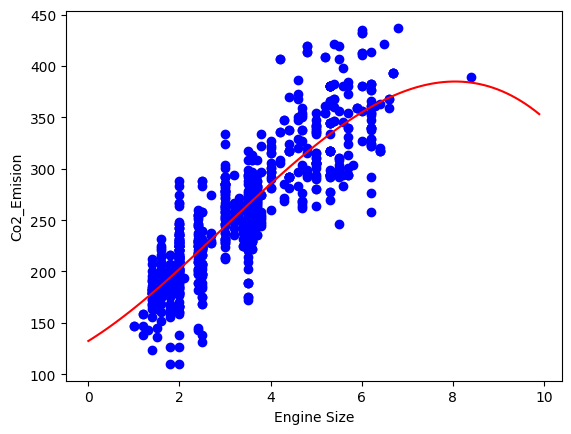

In [35]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color = 'blue')
xx = np.arange(0.0, 10.0, 0.1)
yy = reg.intercept_[0] + reg.coef_[0][1] * xx + reg.coef_[0][2] * np.power(xx, 2) + reg.coef_[0][3] * np.power(xx, 3)
plt.plot(xx, yy, '-r')
plt.xlabel('Engine Size')
plt.ylabel('Co2_Emision')


In [36]:
test_x_poly = poly.fit_transform(test_x)
test_y_ = reg.predict(test_x_poly)
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y, test_y_))

Mean absolute error: 21.94
Residual sum of squares (MSE): 816.16
R2-score: 0.80
